### Movielens (Case study)

**Problem Statement:**

Here, we have to perform the analysis using the Exploratory Data Analysis technique. We need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings. 


**Analysis Tasks to be performed:**

•	Import the three datasets 

•	Create a new dataset [Master_Data] with the following columns MovielD Title UserlD Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovielD&Userld) 

•	Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

•	Explore the datasets using visual representations (graphs or tables), also include your comments on the following: 
        - User Age Distribution
        - User rating of the movie "Toy Story"
        - Top 25 movies by viewership rating
        - Find the ratings for all the movies reviewed by for a particular user of user id = 2696

•	Feature Engineering:
Use column genres:
        -	Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
        
        - Create a separate column for each genre category with a one-hot encoding (1 and 0) whether or not the movie belongs to that genre
        
        - Determine the features affecting the ratings of any particular movie. 
        
        - Develop an appropriate model to predict the movie ratings

In [3]:
#import packages
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt # data visualization library
from wordcloud import WordCloud, STOPWORDS #used to generate world cloud
#cosine similarity
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import seaborn as sns
sns.set(style="ticks", color_codes=True)

%matplotlib inline

#### Step 01: Importing the all three datasets 

In [4]:
#reading files
users_col = ['user_id', 'gender', 'age', 'occupation', 'zip']
ratings_col = ['user_id', 'movie_id', 'rating', 'timestamp']
movies_col = ['movie_id', 'title', 'genres']
#reading table
users = pd.read_table('./dataset/users.dat', sep='::', header=None, names=users_col)
ratings = pd.read_table('./dataset/ratings.dat', sep='::', header=None, names=ratings_col)
movies = pd.read_table('./dataset/movies.dat', sep='::', header=None, names=movies_col)

C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:6: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:7: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:8: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [5]:
#users top 5 rows
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
#info users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip         6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [7]:
#describe
users.describe()

,user_id,age,occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [8]:
#check for null
users.isnull().sum()

user_id       0
gender        0
age           0
occupation    0
zip           0
dtype: int64

In [9]:
#ratings top 5 rows
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [10]:
#info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [11]:
#describe
ratings.describe()

,user_id,movie_id,rating,timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [12]:
#check null
ratings.isnull().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [13]:
#movies
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
#info
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [15]:
#check for null
movies.isnull().sum()

movie_id    0
title       0
genres      0
dtype: int64

In [16]:
#merge data frame
df = pd.merge(pd.merge(ratings, users), movies)
df = pd.DataFrame(df)

In [17]:
#columns
df.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'gender', 'age',
       'occupation', 'zip', 'title', 'genres'],
      dtype='object')

In [18]:
#create features column
features_col=["movie_id","user_id","rating","title","age","gender","occupation"]
Master_Data=df[features_col]
Master_Data.head()

,movie_id,user_id,rating,title,age,gender,occupation
0,1193,1,5,One Flew Over the Cuckoo's Nest (1975),1,F,10
1,1193,2,5,One Flew Over the Cuckoo's Nest (1975),56,M,16
2,1193,12,4,One Flew Over the Cuckoo's Nest (1975),25,M,12
3,1193,15,4,One Flew Over the Cuckoo's Nest (1975),25,M,7
4,1193,17,5,One Flew Over the Cuckoo's Nest (1975),50,M,1


#### Step 02: Explore the datasets with visual representations 

In [19]:
#shape of Data frame
Master_Data.shape

(1000209, 7)

In [20]:
#Take top 500 rows on the basis of ratings
df1= Master_Data.sort_values(by ='rating',axis=0, ascending=False, inplace=False,)[:500].reset_index(drop= True)

In [21]:
df1.head()

,movie_id,user_id,rating,title,age,gender,occupation
0,1193,1,5,One Flew Over the Cuckoo's Nest (1975),1,F,10
1,2770,5374,5,Bowfinger (1999),35,M,7
2,2770,5483,5,Bowfinger (1999),25,F,6
3,3635,1812,5,"Spy Who Loved Me, The (1977)",25,F,12
4,3635,1871,5,"Spy Who Loved Me, The (1977)",45,F,1


In [22]:
#check male and female count for title
df1_gender=df1[['title','gender']].groupby(['gender','title']).count()
df1_gender[:25]

Empty DataFrame
Columns: []
Index: [(F, Before Sunrise (1995)), (F, Bird on a Wire (1990)), (F, Bowfinger (1999)), (F, Bridge on the River Kwai, The (1957)), (F, Four Days in September (1997)), (F, Last Emperor, The (1987)), (F, Naked (1993)), (F, On Her Majesty's Secret Service (1969)), (F, One Flew Over the Cuckoo's Nest (1975)), (F, Ordinary People (1980)), (F, Orlando (1993)), (F, Othello (1995)), (F, Spy Who Loved Me, The (1977)), (F, Toys (1992)), (M, Before Sunrise (1995)), (M, Best in Show (2000)), (M, Bird on a Wire (1990)), (M, Bowfinger (1999)), (M, Bridge on the River Kwai, The (1957)), (M, Four Days in September (1997)), (M, Last Emperor, The (1987)), (M, Naked (1993)), (M, On Her Majesty's Secret Service (1969)), (M, Ordinary People (1980)), (M, Othello (1995))]

#### User Age Distribution

In [23]:
df1[["user_id","age"]]

,user_id,age
0,1,1
1,5374,35
2,5483,25
3,1812,25
4,1871,45
...,...,...
495,4964,35
496,5371,25
497,2436,25
498,6013,25


In [24]:
#groupby
df1.groupby('age')['user_id'].count()

age
1      16
18     89
25    193
35     94
45     38
50     45
56     25
Name: user_id, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

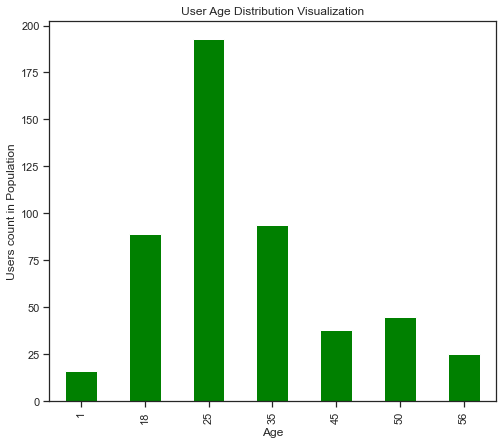

In [25]:
df1.groupby('age')['user_id'].count().plot(kind = 'bar', color = 'green',figsize = (8,7))
plt.xlabel('Age')
plt.ylabel('Users count in Population')
plt.title('User Age Distribution Visualization')
plt.show

C:\Users\Kunal\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<function matplotlib.pyplot.show(*args, **kw)>

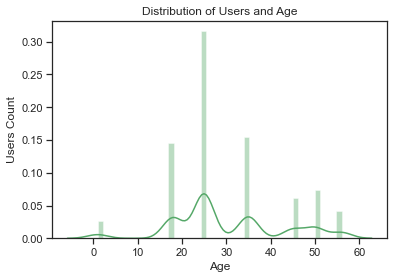

In [26]:
sns.distplot(df1['age'], color = 'g', bins = 45)
plt.xlabel('Age')
plt.ylabel('Users Count')
plt.title('Distribution of Users and Age')
plt.show

#### User rating of the movie "Toy Story"

In [27]:
df[df['title'] == 'Toy Story (1995)'][["title","rating"]].reset_index(drop= True)

,title,rating
0,Toy Story (1995),5
1,Toy Story (1995),4
2,Toy Story (1995),4
3,Toy Story (1995),5
4,Toy Story (1995),5
...,...,...
2072,Toy Story (1995),5
2073,Toy Story (1995),5
2074,Toy Story (1995),4
2075,Toy Story (1995),4


#### Top 25 movies by viewership rating

In [28]:
most_rated = df.groupby('title')[["rating"]].size().sort_values(ascending=False)[:25]
most_rated.head(25)

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

#### Ratings for all the movies reviewed by for a particular user of user id = 2696

In [29]:
df[df['user_id'] == 2696][["title","rating"]].reset_index(drop= True)

,title,rating
0,Back to the Future (1985),2
1,E.T. the Extra-Terrestrial (1982),3
2,L.A. Confidential (1997),4
3,Lone Star (1996),5
4,JFK (1991),1
5,"Talented Mr. Ripley, The (1999)",4
6,Midnight in the Garden of Good and Evil (1997),4
7,Cop Land (1997),3
8,Palmetto (1998),4
9,"Perfect Murder, A (1998)",4


#### Step 03: Feature Engineering

In [30]:
#Split generes
df_genres=pd.DataFrame()
df_genres["genres"]=df["genres"].apply(lambda x: str(x).split("|"))

In [32]:
#getting combined list of genres column
unique_genres_list=list()
for i in range(len(df_genres["genres"])):
    for word in df_genres["genres"][i]:                         
            unique_genres_list.append(word)
            unique_genres_list=list(set(unique_genres_list)) 

In [33]:
#Unique value in genres
unique_genres_list

['War',
 'Mystery',
 'Drama',
 'Adventure',
 'Sci-Fi',
 'Romance',
 'Western',
 'Horror',
 'Film-Noir',
 'Comedy',
 "Children's",
 'Thriller',
 'Crime',
 'Musical',
 'Fantasy',
 'Action',
 'Animation',
 'Documentary']

In [34]:
#define a function that counts the number of times each genre appears
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [35]:
#here we  make census of the genres:
genre_labels = set()
for s in df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [36]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(df, 'genres', genre_labels)
keyword_occurences

[['Comedy', 356580],
 ['Drama', 354529],
 ['Action', 257457],
 ['Thriller', 189680],
 ['Sci-Fi', 157294],
 ['Romance', 147523],
 ['Adventure', 133953],
 ['Crime', 79541],
 ['Horror', 76386],
 ["Children's", 72186],
 ['War', 68527],
 ['Animation', 43293],
 ['Musical', 41533],
 ['Mystery', 40178],
 ['Fantasy', 36301],
 ['Western', 20683],
 ['Film-Noir', 18261],
 ['Documentary', 7910]]

In [37]:
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

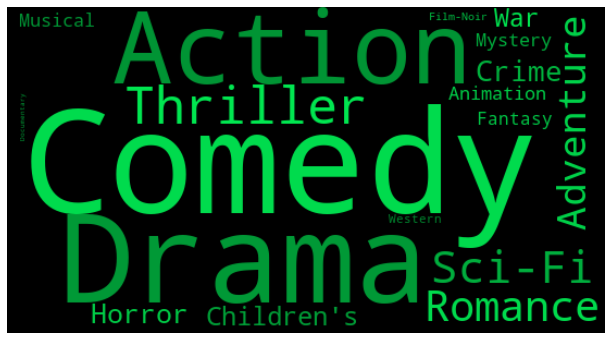

In [38]:
#Result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

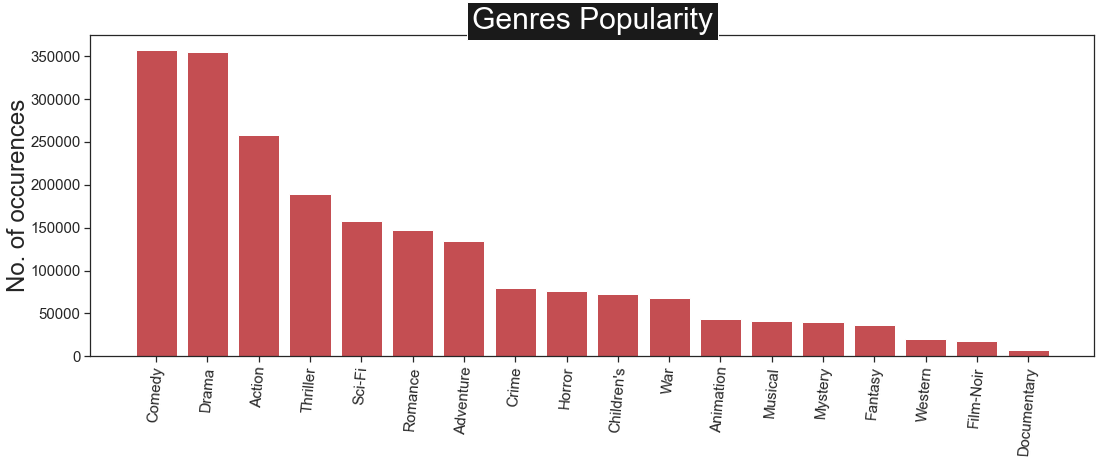

In [39]:
# Display the same result in the histogram
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Genres Popularity",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

#### Create a separate column for each genre category with a one-hot encoding & find features affecting the rating 

In [41]:
s = pd.Series(unique_genres_list)
df1_genres=pd.get_dummies(s)

In [42]:
df1_genres.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [43]:
df1.head()

,movie_id,user_id,rating,title,age,gender,occupation
0,1193,1,5,One Flew Over the Cuckoo's Nest (1975),1,F,10
1,2770,5374,5,Bowfinger (1999),35,M,7
2,2770,5483,5,Bowfinger (1999),25,F,6
3,3635,1812,5,"Spy Who Loved Me, The (1977)",25,F,12
4,3635,1871,5,"Spy Who Loved Me, The (1977)",45,F,1


In [44]:
#Concat two data frame
df1_final = pd.concat([df1, df1_genres], axis=1)
df1_final.head()

,movie_id,user_id,rating,title,age,gender,occupation,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1193,1,5,One Flew Over the Cuckoo's Nest (1975),1,F,10,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2770,5374,5,Bowfinger (1999),35,M,7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2770,5483,5,Bowfinger (1999),25,F,6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3635,1812,5,"Spy Who Loved Me, The (1977)",25,F,12,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3635,1871,5,"Spy Who Loved Me, The (1977)",45,F,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
#Correlation Matrix with Heatmap
target=df1_final["rating"]
df1_final=df1_final.drop(columns=["rating"],axis=1)
corr = df1_final.corr()
corr.style.background_gradient(cmap='coolwarm')

,movie_id,user_id,age,occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,1.000000,0.245389,-0.050895,-0.026442,0.144565,0.144565,-0.188061,0.144565,-0.188061,0.144565,0.144565,-0.188061,0.144565,0.144565,0.144565,-0.188061,-0.188061,0.144565,0.144565,0.144565,-0.794480,0.144565
user_id,0.245389,1.000000,-0.131906,-0.086052,-0.051932,-0.165625,0.377628,-0.097645,0.379840,-0.081424,-0.185091,0.375711,-0.075968,-0.109147,-0.111359,0.357425,0.359637,-0.154271,-0.156925,-0.087765,-0.432681,-0.140409
age,-0.050895,-0.131906,1.000000,0.078132,0.155659,-0.034944,-0.034944,-0.034944,0.346262,-0.034944,-0.034944,-0.034944,0.441564,-0.492391,-0.034944,-0.168366,0.155659,-0.168366,0.346262,0.155659,-0.492391,-0.034944
occupation,-0.026442,-0.086052,0.078132,1.000000,-0.104906,0.131133,-0.104906,-0.152114,-0.388153,0.225549,0.508796,-0.152114,-0.104906,0.036717,0.131133,0.319964,-0.104906,0.225549,-0.388153,-0.340946,0.036717,0.225549
Action,0.144565,-0.051932,0.155659,-0.104906,1.000000,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824
Adventure,0.144565,-0.165625,-0.034944,0.131133,-0.058824,1.000000,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824
Animation,-0.188061,0.377628,-0.034944,-0.104906,-0.058824,-0.058824,1.000000,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824
Children's,0.144565,-0.097645,-0.034944,-0.152114,-0.058824,-0.058824,-0.058824,1.000000,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824
Comedy,-0.188061,0.379840,0.346262,-0.388153,-0.058824,-0.058824,-0.058824,-0.058824,1.000000,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824
Crime,0.144565,-0.081424,-0.034944,0.225549,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,1.000000,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824


**Note:**
Here we will take the following features "user_id","age","occupation","Adventure","Animation","Fantasy","Romance","Thriller","War"

#### Step 04: Developing an appropriate model to predict the movie ratings

In [46]:
#columns
df1_final.columns

Index(['movie_id', 'user_id', 'title', 'age', 'gender', 'occupation', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [47]:
main_features=["user_id","age","occupation","Adventure","Animation","Fantasy","Romance","Thriller","War"]
df1_final[main_features].head()

,user_id,age,occupation,Adventure,Animation,Fantasy,Romance,Thriller,War
0,1,1,10,0.0,0.0,0.0,0.0,0.0,1.0
1,5374,35,7,0.0,0.0,0.0,0.0,0.0,0.0
2,5483,25,6,0.0,0.0,0.0,0.0,0.0,0.0
3,1812,25,12,1.0,0.0,0.0,0.0,0.0,0.0
4,1871,45,1,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
#Fill null value
df1_final[main_features]=df1_final[main_features].fillna(0)

In [49]:
#Define features and labels
features =df1_final[main_features].values
label = target.values

In [50]:
#Apply K Nearest Neighbors algorithms
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,Y_train,Y_test = train_test_split(features,label,test_size=0.2, random_state=232 )
model = KNeighborsClassifier(n_neighbors = 217)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=217)

In [51]:
userid = int(input("user_id: "))
age = int(input("Age Group( 1,5,56, 25, 45):"))
occupation = int(input("Occupation group value (10, 16, 15,  7, 20,  9):"))
Adventure = int(input("Enter the Adventure 0 or 1: "))
Animation = int(input("Enter the Animation 0 or 1: "))
Fantasy = int(input("Enter the Fantasy 0 or 1: "))
Romance = int(input("Enter the Romance 0 or 1: "))
Thriller = int(input("Enter the Thriller 0 or 1: "))
War = int(input("Enter the War 0 or 1: "))
featureInput = np.array([[userid,age,occupation,Adventure,Animation,Fantasy,Romance,Thriller,War]])
rating = model.predict(featureInput)
print("Rating of the Movie is: ", rating)

user_id: 5374
Age Group( 1,5,56, 25, 45):56
Occupation group value (10, 16, 15,  7, 20,  9):16
Enter the Adventure 0 or 1: 1
Enter the Animation 0 or 1: 0
Enter the Fantasy 0 or 1: 0
Enter the Romance 0 or 1: 0
Enter the Thriller 0 or 1: 0
Enter the War 0 or 1: 0
Rating of the Movie is:  [5]


## Recommendation Engine in PySpark

Apache Spark is a fast and general-purpose cluster computing system. It provides high-level APIs in Java, Scala, Python and R, and an optimized engine that supports general execution graphs. It also supports a rich set of higher-level tools including Spark SQL for SQL and structured data processing, MLlib for machine learning, GraphX for graph processing, and Spark Streaming.

#### Predict the movie ratings using PySpark

In [52]:
#Create csv file
df[['user_id', 'movie_id', 'rating']].to_csv("movielens_ratings.csv")

In [53]:
#import
from pyspark.sql import SparkSession

In [54]:
spark = SparkSession.builder.appName('rec').getOrCreate()

In [55]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS

In [56]:
data = spark.read.csv('movielens_ratings.csv',inferSchema=True,header=True)

In [57]:
data.head()

Row(_c0=0, user_id=1, movie_id=1193, rating=5)

In [58]:
data.describe().show()

+-------+------------------+------------------+------------------+------------------+
|summary|               _c0|           user_id|          movie_id|            rating|
+-------+------------------+------------------+------------------+------------------+
|  count|           1000209|           1000209|           1000209|           1000209|
|   mean|          500104.0| 3024.512347919285|1865.5398981612843| 3.581564453029317|
| stddev|288735.61203547445|1728.4126948999774|1096.0406894572463|1.1171018453732597|
|    min|                 0|                 1|                 1|                 1|
|    max|           1000208|              6040|              3952|                 5|
+-------+------------------+------------------+------------------+------------------+



In [59]:
# Smaller dataset so we will use 0.8 / 0.2
(training, test) = data.randomSplit([0.8, 0.2])

In [60]:
# Build the recommendation model using ALS on the training data
als = ALS(maxIter=5, regParam=0.01, userCol="user_id", itemCol="movie_id", ratingCol="rating")
model = als.fit(training)

In [61]:
# Evaluate the model by computing the RMSE on the test data
predictions = model.transform(test)

In [62]:
predictions.show()

+------+-------+--------+------+----------+
|   _c0|user_id|movie_id|rating|prediction|
+------+-------+--------+------+----------+
|893913|    673|     148|     5| 3.9762628|
|893931|   5333|     148|     3| 2.0076513|
|893929|   4387|     148|     1|  2.046209|
|893920|   2383|     148|     2| 2.1532629|
|893925|   3539|     148|     3| 2.6881423|
|893917|   1150|     148|     2| 2.9536047|
|893926|   3829|     148|     2| 3.0395212|
|786629|   4169|     463|     2| 2.7527752|
|786611|   2629|     463|     4| 3.2018633|
|786631|   4277|     463|     4| 3.7362776|
|786609|   2051|     463|     1|  2.012721|
|786632|   4510|     463|     2| 1.8587962|
|786612|   2777|     463|     3| 3.0433328|
|786615|   3224|     463|     3| 3.2243242|
|789434|   3425|     471|     4| 4.4489713|
|789619|   5222|     471|     4| 3.3407593|
|789260|   1404|     471|     3| 3.1582851|
|789524|   4172|     471|     3| 4.2251534|
|789636|   5367|     471|     3| 3.4474192|
|789262|   1441|     471|     5|

In [63]:
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating",predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

Root-mean-square error = nan


In [64]:
single_user = test.filter(test['user_id']==11).select(['movie_id','user_id'])

In [65]:
# User had 10 ratings in the test data set 
# Realistically this should be some sort of hold out set!
single_user.show()

+--------+-------+
|movie_id|user_id|
+--------+-------+
|    2321|     11|
|     608|     11|
|    1188|     11|
|     110|     11|
|     593|     11|
|    3552|     11|
|      50|     11|
|    2282|     11|
|    2959|     11|
|    1747|     11|
|      36|     11|
|     597|     11|
|    1682|     11|
|    1059|     11|
|     454|     11|
|     345|     11|
|     333|     11|
|    2174|     11|
|     784|     11|
|    2795|     11|
+--------+-------+
only showing top 20 rows



In [66]:
reccomendations = model.transform(single_user)

In [67]:
reccomendations.orderBy('prediction',ascending=False).show()

+--------+-------+----------+
|movie_id|user_id|prediction|
+--------+-------+----------+
|    2959|     11| 5.1799145|
|     441|     11|  5.086613|
|      50|     11| 4.5581536|
|     608|     11| 4.3877215|
|    2706|     11| 4.2938313|
|     593|     11| 4.2788982|
|    1288|     11|  4.170743|
|    3552|     11| 3.9738593|
|     110|     11| 3.9452393|
|    2109|     11| 3.7781613|
|    3129|     11| 3.7602036|
|    2335|     11| 3.7032373|
|    1682|     11|  3.614766|
|    2282|     11|  3.514328|
|    2795|     11| 3.4694815|
|     342|     11| 3.4548178|
|      36|     11| 3.4371989|
|     784|     11| 3.3396113|
|     333|     11| 3.2486322|
|     345|     11| 3.1116364|
+--------+-------+----------+
only showing top 20 rows

